# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations; will use the random library to do this 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for each_lat_lng in lat_lngs:
    city = citipy.nearest_city(each_lat_lng[0], each_lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count using the len global method
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
# First need to create empty container to hold the results: 
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

# Set the base url to tell it what server we are pinging as a client for data 
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #select units as found in api documentation 
query_url = f"{base_url}appid={api_key}&units={units}&q=" #search url as dictated by the api documentation using f string


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json() #requests.get method to extract the data 
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):   #except will handle errors and allow the code to continue to run and not time out
        print("City not found. Skipping...")
print("Complete")

Processing Record 1 of Set 1 : komsomolskiy
Processing Record 2 of Set 1 : la plata
Processing Record 3 of Set 1 : nanortalik
Processing Record 4 of Set 1 : swan river
Processing Record 5 of Set 1 : ushuaia
Processing Record 6 of Set 1 : bhor
Processing Record 7 of Set 1 : atuona
Processing Record 8 of Set 1 : palmer
Processing Record 9 of Set 1 : mareeba
Processing Record 10 of Set 1 : axim
Processing Record 11 of Set 1 : puerto ayora
Processing Record 12 of Set 1 : rikitea
Processing Record 13 of Set 1 : souillac
City not found. Skipping...
Processing Record 14 of Set 1 : bredasdorp
Processing Record 15 of Set 1 : punta arenas
Processing Record 16 of Set 1 : hilo
Processing Record 17 of Set 1 : kapaa
Processing Record 18 of Set 1 : moquegua
Processing Record 19 of Set 1 : coralville
Processing Record 20 of Set 1 : karratha
Processing Record 21 of Set 1 : abnub
Processing Record 22 of Set 1 : hithadhoo
Processing Record 23 of Set 1 : arraial do cabo
Processing Record 24 of Set 1 : ilu

Processing Record 35 of Set 4 : mujiayingzi
Processing Record 36 of Set 4 : hunucma
Processing Record 37 of Set 4 : yar-sale
Processing Record 38 of Set 4 : abomsa
Processing Record 39 of Set 4 : kerema
Processing Record 40 of Set 4 : kieta
Processing Record 41 of Set 4 : haines junction
Processing Record 42 of Set 4 : saint-pierre
Processing Record 43 of Set 4 : vestmanna
Processing Record 44 of Set 4 : port lincoln
Processing Record 45 of Set 4 : sakakah
City not found. Skipping...
Processing Record 46 of Set 4 : polson
Processing Record 47 of Set 4 : beloha
Processing Record 48 of Set 4 : vestmannaeyjar
Processing Record 49 of Set 4 : iracoubo
Processing Record 50 of Set 4 : pandan
Processing Record 0 of Set 5 : ust-koksa
Processing Record 1 of Set 5 : sept-iles
Processing Record 2 of Set 5 : alofi
Processing Record 3 of Set 5 : pangnirtung
Processing Record 4 of Set 5 : bambous virieux
Processing Record 5 of Set 5 : nouadhibou
Processing Record 6 of Set 5 : rafraf
Processing Record

Processing Record 19 of Set 8 : yagodnoye
Processing Record 20 of Set 8 : faanui
Processing Record 21 of Set 8 : okhotsk
Processing Record 22 of Set 8 : mahibadhoo
Processing Record 23 of Set 8 : arkadelphia
Processing Record 24 of Set 8 : nacozari
Processing Record 25 of Set 8 : iskateley
Processing Record 26 of Set 8 : butterworth
Processing Record 27 of Set 8 : middle island
City not found. Skipping...
Processing Record 28 of Set 8 : kahului
Processing Record 29 of Set 8 : luis correia
Processing Record 30 of Set 8 : stykkisholmur
Processing Record 31 of Set 8 : east london
Processing Record 32 of Set 8 : tessalit
Processing Record 33 of Set 8 : neryungri
Processing Record 34 of Set 8 : colares
Processing Record 35 of Set 8 : mount gambier
City not found. Skipping...
Processing Record 36 of Set 8 : obo
Processing Record 37 of Set 8 : vostok
Processing Record 38 of Set 8 : tiruchchendur
Processing Record 39 of Set 8 : sobolevo
Processing Record 40 of Set 8 : saint anthony
Processing 

Processing Record 4 of Set 12 : quetigny
Processing Record 5 of Set 12 : necochea
Processing Record 6 of Set 12 : wollongong
Processing Record 7 of Set 12 : muriwai beach
Processing Record 8 of Set 12 : igrim
Processing Record 9 of Set 12 : okha
Processing Record 10 of Set 12 : tutoia
City not found. Skipping...
Processing Record 11 of Set 12 : broome
Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# To create a dataframe need to create a list of dictionaries or a dictionary of lists 
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,  #the order these are written is the order they will appear in the dataframe
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list,
})

weather_dict #display the newly created dataframe

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yangi Marg`ilon,40.4272,71.7189,24.80,50,75,4.61,UZ,1611435054
1,La Plata,-34.9215,-57.9545,91.99,42,0,1.99,AR,1611435054
2,Nanortalik,60.1432,-45.2371,23.16,88,0,7.38,GL,1611435054
3,Swan River,52.1058,-101.2676,5.00,78,99,9.22,CA,1611435054
4,Ushuaia,-54.8000,-68.3000,64.40,36,75,19.57,AR,1611435054
...,...,...,...,...,...,...,...,...,...
567,Muriwai Beach,-36.8167,174.4500,68.00,88,92,1.99,NZ,1611435017
568,Igrim,63.1906,64.4162,-39.08,80,9,1.99,RU,1611435165
569,Okha,53.5739,142.9478,-10.37,85,100,3.74,RU,1611435165
570,Tutóia,-2.7619,-42.2744,84.20,74,75,13.80,BR,1611435166


In [7]:
weather_dict.count() #testing to make sure each row has an equal amount of data

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [8]:
# Exporting the data to a .csv; will be saved into the output_data folder ../ is telling computer to go up one directory 
weather_dict.to_csv("../output_data/cities_data.csv", index = False) #setting the index to false so i don't have an additional index column

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidity = weather_dict["Humidity"].max()
humidity #using the .max() method to see what the max value is in the humidity column; it is 100 so we can skip the removal

100

In [10]:
# Starter code uses a .describe() method which all shows us that the max humidity is 100

In [11]:
#  Get the indices of cities that have humidity over 100%.
# we know that nothing over 100 exists so we may skip this part 

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

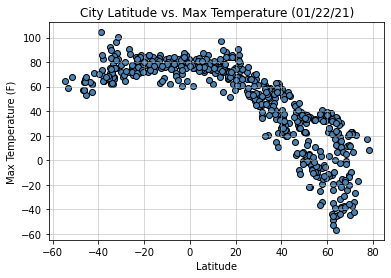

In [13]:
# Create the scatter plot using plt.scatter
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/22/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha=0.5) #recall alpha is the amount of opaqueness 

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

In the plot above we are analyzing the effect on max temperature with regards to a city's latitude.  One would expect to see the max temperature decrease as latitude increases, which is evidenced by the plot.

## Latitude vs. Humidity Plot

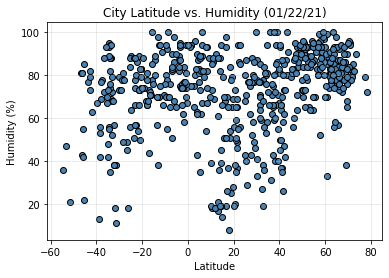

In [14]:
# Create the scatter plot using plt.scatter
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/22/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=0.5, alpha=0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

In the plot above we are analyzing the effect on the percentage of humidity with regards to a city's latitude.  One would expect to see humidity decrease as latitude increases, however there is no strong evidence in the plot.

## Latitude vs. Cloudiness Plot

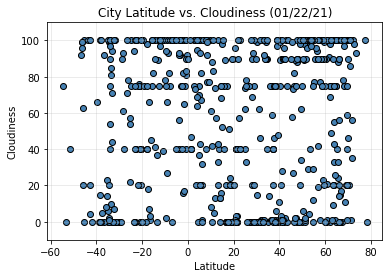

In [15]:
# Create the scatter plot using plt.scatter
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/22/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness")
plt.ylim(-10,110) #setting this to get a better picture of the data 

# Set grid lines
plt.grid(linestyle='-', linewidth=0.5, alpha=0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

In the plot above we are analyzing the trend between cloudiness and a city's latitude.  One would expect to see more clouds as latitude increases, however there is no strong evidence in the plot.

## Latitude vs. Wind Speed Plot

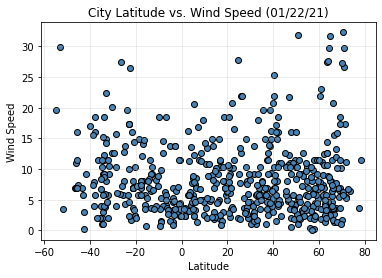

In [16]:
# Create the scatter plot using plt.scatter
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed (01/22/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed")

# Set grid line
plt.grid(linestyle='-', linewidth=0.5, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed.png")

In the plot above we are analyzing the trend between wind speed and a city's latitude.  One would expect to see windier conditions as latitude increases.

## Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0] #northern hemisphere is where latitude is >= 0
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0] #southern hemisphere is where latitude is <0

In [18]:
# Define a function for creating linear regression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regression_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    

The r-squared is : -0.85


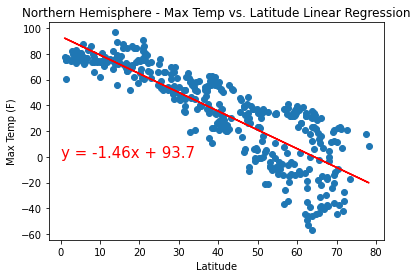

In [19]:
# Call on function 1

equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call on function 2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.4


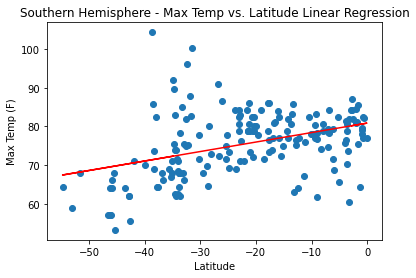

In [20]:
# Call on function 1
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call on function 2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.34


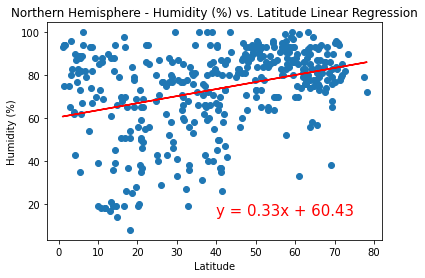

In [21]:
# Call on function 1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call on function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.36


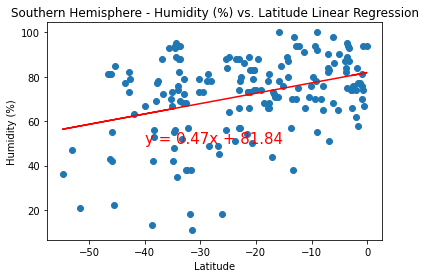

In [22]:
# Call on function 1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call on function 2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.14


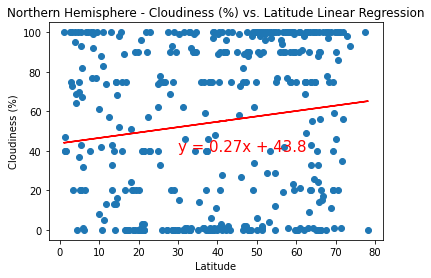

In [23]:
# Call on function 1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call on function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.29


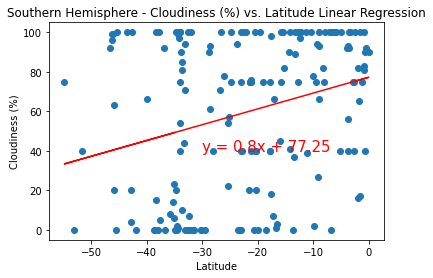

In [24]:
# Call on function 1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call on function 2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.09


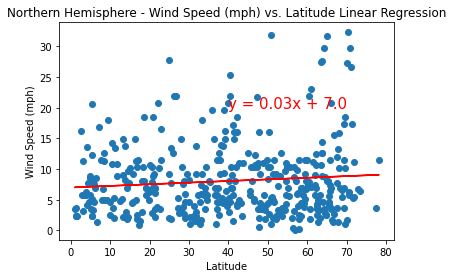

In [25]:
# Call on function 1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call on function 2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.27


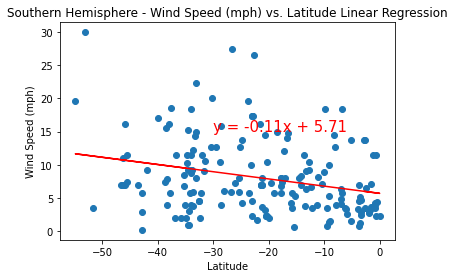

In [26]:
# Call on function 1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call on function 2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")